In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [173]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [13]:
archivo='/Users/matiasinostrozacifuentes/Desktop/python_intro/DataScience_Unilever/Semana_5/Data/abalone.csv'
data_abalones=pd.read_csv(archivo,header=None)
data_abalones

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [14]:
data_abalones.columns=['Sex','Length','Diameter','Weight','Whole_weight','Sucked_weight','Viseral_weight','Shell_weight','Rings']

In [29]:
data_abalones

,Sex,Length,Diameter,Weight,Whole_weight,Sucked_weight,Viseral_weight,Shell_weight,Rings,Sex_New
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


In [16]:
lista=[]
for i in data_abalones['Sex']:
    if i == 'M':
        lista.append(0)
    else:
        lista.append(1)
data_abalones['Sex_New']=lista


In [17]:
data_abalones

,Sex,Length,Diameter,Weight,Whole_weight,Sucked_weight,Viseral_weight,Shell_weight,Rings,Sex_New
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


Revisando la data

In [18]:
data_abalones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Weight          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Sucked_weight   4177 non-null   float64
 6   Viseral_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Sex_New         4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


No hay nulos

In [19]:
data_abalones.describe()

,Length,Diameter,Weight,Whole_weight,Sucked_weight,Viseral_weight,Shell_weight,Rings,Sex_New
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.634187
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,1.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000


In [20]:
data_abalones.corr()

,Length,Diameter,Weight,Whole_weight,Sucked_weight,Viseral_weight,Shell_weight,Rings,Sex_New
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.240376
Weight,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.215459
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.252038
Sucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.251793
Viseral_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.242194
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.181831
Sex_New,-0.236543,-0.240376,-0.215459,-0.252038,-0.251793,-0.242194,-0.235391,-0.181831,1.000000


Existen altas correlaciones entre los datos

In [21]:
data_abalones.drop_duplicates(inplace=True)

In [22]:
data_abalones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Weight          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Sucked_weight   4177 non-null   float64
 6   Viseral_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   Sex_New         4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 359.0+ KB


No habian duplicados

Generando la regresion con KNN

In [70]:
X=data_abalones['Length'].to_numpy()

In [149]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
r2=0
count=0
X = data_abalones.drop(columns=['Sex','Rings','Sex_New']) # Separación de las características
y = data_abalones['Rings'] # Separación del target (corresponde a lo que quiero predecir)
while (r2<0.57):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=10)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.5345628645398754
0.4817394035316296
0.5101061171761123
0.5060470846395497
0.5025575963708149
0.48965057416309477
0.5105670598279237
0.5267965467856037
0.5482877994011977
0.512031866871031
0.5338285927043509
0.5421861311251785
0.50062000215918
0.49540381565342395
0.5057765965450117
0.5063331859784218
0.5070744403178267
0.5080755922649776
0.5201103018306467
0.5045841758422782
0.5227009661578608
0.5309943071280733
0.5244971450826817
0.5501228909938816
0.5239853045388185
0.5334786094256951
0.5081388079908544
0.5269199078178533
0.5298772177039306
0.5314428950140104
0.5545118891775287
0.4910221236957538
0.4992189211504635
0.4955861333979884
0.494295510188854
0.5538962058771693
0.502643891631195
0.48678760401314725
0.5118761261180003
0.5160184853974863
0.5017462358549333
0.535298688822375
0.5107678253006998
0.5119439366014777
0.5357725570425275
0.49988575973849136
0.5091832599622952
0.5098461567731043
0.5209703950006732
0.5211491952652645
0.5286905873949117
0.5491388749651365
0.506543104269

La información de la data dice que el maximo que obtuvieron con KNN regression fue de 62,5% r2 con 3 clasificaciones.
Se procederá ha hacer lo mismo

In [150]:
anillos=[]
for i in data_abalones['Rings']:
    if i>=1 and i<=8:
        anillos.append(0)
    elif i>=9 and i<=10:
        anillos.append(1)
    else:
        anillos.append(2)
data_abalones['anillos']=anillos

In [151]:
data_abalones

,Sex,Length,Diameter,Weight,Whole_weight,Sucked_weight,Viseral_weight,Shell_weight,Rings,Sex_New,anillos
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,1


In [168]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
r2=0
count=0
X = data_abalones.drop(columns=['Sex','Rings','Sex_New','anillos']) # Separación de las características
y = data_abalones['anillos'] # Separación del target (corresponde a lo que quiero predecir)
while (r2<0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    knn = KNeighborsRegressor(n_neighbors=5)
    knn.fit(X_train, y_train) # Ojo: fit en base a los de entrenamiento!!
    y_pred=knn.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.46988059316994024
0.4047007533221709
0.42253957701416867
0.448271512925725
0.46680358705323355
0.42993289813960367
0.4296659569890876
0.4708792723186457
0.4870506309662571
0.4312183492272278
0.4176069323467072
0.44060210501558184
0.42915324179740255
0.44652680652680654
0.4565980021985374
0.4597115728595276
0.42042942652155546
0.42243474509239953
0.43042118019123055
0.4134756544963607
0.4650039980809211
0.4438663992325804
0.4606917315814172
0.4138812262167907
0.391038369231704
0.4673080634397814
0.42021006541739414
0.41960815740233226
0.49619874602049185
0.4639734822971271
0.4634605902784118
0.4550153934299941
0.44977629876132375
0.44331415547650266
0.4235335054184055
0.4326978730601716
0.4230892693935281
0.4480171271954768
0.4191554426247751
0.3940698232140476
0.4624622968656228
0.4695878662362186
0.40703631376355964
0.44027507975895075
0.46407935405305833
0.45552407661291794
0.47391757615246777
0.45810186867318425
0.41438555861010684
0.4428592447278077
0.3872353765140334
0.438966445

Con un regresor lineal multiple

In [170]:
r2=0
count=0
X = data_abalones.drop(columns=['Sex','Rings','Sex_New','anillos']) # Separación de las características
y = data_abalones['anillos'] # Separación del target (corresponde a lo que quiero predecir)
while (r2<0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)
    lin_reg = LinearRegression() # Creación de objeto Regresor lineal Scikit-Learn
    lin_reg.fit(X_train,y_train)
    y_pred=lin_reg.predict(X_test)
    r2=r2_score(y_test, y_pred)
    count+=1
    print(r2)
print(count)

0.4072621732463345
0.4305882955933089
0.4544687606268577
0.43298756330788357
0.42045506072976024
0.4533936886710853
0.4585248308050509
0.42451027713747724
0.46655512253797526
0.42780727797032003
0.4028706149881476
0.42262120382579516
0.4641833265137816
0.4605836364785514
0.4286826097885008
0.45656393229901726
0.423140992843696
0.4638723779388676
0.4084097515673155
0.4368689758617581
0.4495866181219115
0.40104149307757964
0.46464326560744784
0.49087953762399383
0.4395053170407839
0.44674976918100795
0.4664293712667038
0.4547099070017748
0.42474609717151934
0.4544804083195563
0.48607072675610064
0.4225120104058657
0.4252246550273484
0.4570052861557997
0.40016638099040824
0.4445483065395591
0.4110487366169733
0.4127719645602175
0.4427051773770043
0.42743121211574453
0.4237448440693936
0.4609563668812041
0.40368853639997726
0.45246088767299797
0.45583081060408626
0.4737986722656591
0.42035438388764146
0.4076738047598951
0.4323130557157233
0.45964362361556865
0.4533860950617066
0.4611330722

# Clasificación

In [171]:
def plotCMa(cma,labels):
    cma = cma/cma.sum(axis=1).reshape(-1,1)
    f= plt.figure(figsize=(16, 10))
    plt.matshow(cma, fignum=f.number)
    plt.clim(0, 1)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Confusion matrix", fontsize=20)
    plt.xticks(range(len(labels)), [f"{label} (Etiqueta)" for label in labels], fontsize=16)
    plt.yticks(range(len(labels)), [f"{label} (Real)" for label in labels], fontsize=16)
    ax = plt.gca()

    for i in range(cma.shape[0]):
        for j in range(cma.shape[1]):
            value = cma[i][j]
            ax.text(j,i,"{0:.4f}".format(value),ha="center", va="center", color="k", fontsize=16)



Accuracy: 0.6228070175438597
Accuracy: 0.6259968102073366
Accuracy: 0.6028708133971292
Accuracy: 0.6228070175438597
Accuracy: 0.6395534290271132
Accuracy: 0.6275917065390749
Accuracy: 0.6188197767145136
Accuracy: 0.620414673046252
Accuracy: 0.6363636363636364
Accuracy: 0.631578947368421
Accuracy: 0.6236044657097288
Accuracy: 0.6212121212121212
Accuracy: 0.6228070175438597
Accuracy: 0.60207336523126
Accuracy: 0.5917065390749602
Accuracy: 0.631578947368421
Accuracy: 0.613237639553429
Accuracy: 0.6188197767145136
Accuracy: 0.631578947368421
Accuracy: 0.6196172248803827
Accuracy: 0.6307814992025519
Accuracy: 0.6100478468899522
Accuracy: 0.6196172248803827
Accuracy: 0.6148325358851675
Accuracy: 0.6212121212121212
Accuracy: 0.6108452950558214
Accuracy: 0.620414673046252
Accuracy: 0.6028708133971292
Accuracy: 0.6323763955342903
Accuracy: 0.6267942583732058
Accuracy: 0.6323763955342903
Accuracy: 0.6076555023923444
Accuracy: 0.6275917065390749
Accuracy: 0.6363636363636364
Accuracy: 0.6315789473

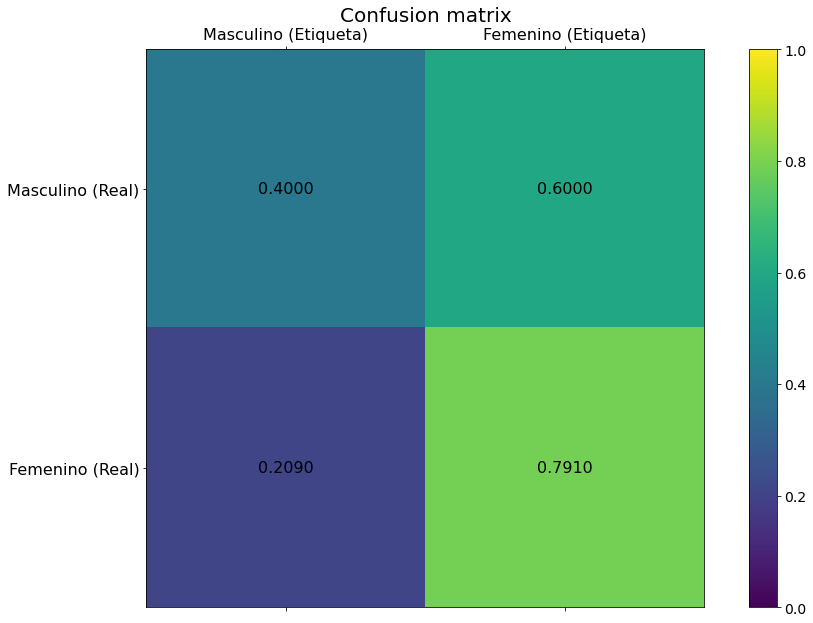

In [177]:
X = data_abalones.drop(columns=['Sex','Rings','Sex_New','anillos']) # Separación de las características
y = data_abalones['Sex_New'] # Separación del target (corresponde a lo que quiero predecir)
accuracy=0
count=0
while (accuracy<=0.65):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3)

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train) 
    predictions = knn.predict(X_test)
    accuracy=knn.score(X_test, y_test)
    count+=1
#print(predictions.tolist())
#print(y_test.tolist())
    print('Accuracy:',knn.score(X_test, y_test))
print(count)
cm = metrics.confusion_matrix(y_test,predictions)
plotCMa(cm,['Masculino','Femenino'])
print(classification_report(y_test,predictions , target_names=['Masculino','Femenino']))

1. Claramente se pueden usar ambas regresiones ya que las dos, como lo dice el nombre, permiten predecir algún valor, pero debido a que sus metodos mátematicos son distintos generan dos herramientas para poder predecir.
2. en ese caso no, debido a que las regresiones solo nos permiten obtener una curva para el comportamiento de los datos, lo que se podría hacer es que dado esa curva generar dos categorias, los que esten por sobre la curva y los que esten por debajo de esta.